Analysing Selling Price of used Cars using Python

Problem Statement: Our friend Otis wants to sell his car but isn’t sure about the price. He wants to maximize profit while ensuring a reasonable deal for buyers. To help Otis we will analyze the dataset and determine the factors affecting car prices.

In [5]:
print("hello")

hello


In [6]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("cpp.csv")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Here we cans see, columns namese are not mentioned. So in the later stage we will add headers to our dataset. Also there are some columns which are required to be eliminated.

In [8]:
df.shape

(204, 26)

The dataset contains 204 rows and 26 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.60        204 non-null    float64
 10  168.80       204 non-null    float64
 11  64.10        204 non-null    float64
 12  48.80        204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [10]:
df.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [11]:
# Adding headers to our dataset

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration","num-of-doors", "body-style","drive-wheels", "engine-location", "wheel-base","length", "width","height", "curb-weight", "engine-type","num-of-cylinders", "engine-size", "fuel-system","bore","stroke", "compression-ratio", "horsepower", "peak-rpm","city-mpg","highway-mpg", "price"]

df.columns = headers


In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [13]:
# Checking for missing values

df.isna().any()


symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

There are no missing values.

In [14]:
# Convert MPG to L/100Km

df['city-mpg'] = 235/df['city-mpg']
df.rename(columns = {'city-mpg':'city-L / 100km'}, inplace=True)
df.columns





Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')

In [15]:
df.shape

(204, 26)

In [16]:
data = df[df.price == "?"]
data.shape

(4, 26)

In [17]:
df1 = df[df.price != "?"]
df1.price = df1.price.astype(int)
df1.shape

C:\Users\diksh\AppData\Local\Temp\ipykernel_12892\3873267515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.price = df1.price.astype(int)


(200, 26)

In [18]:
# Normalizing Features

df1["length"] = df1['length']/df1["length"].max()
df1['width'] = df1['width']/df1['width'].max()
df1["height"] = df1["height"]/df1['height'].max()

# binning-grouping values

bins = numpy.linspace(min(df1.price), max(df1.price), 4)
groups = ["low", "medium", "high"]

df1.price_binned = pd.cut(df1.price, bins, labels = groups, include_lowest = True)


C:\Users\diksh\AppData\Local\Temp\ipykernel_12892\3087764835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["length"] = df1['length']/df1["length"].max()
C:\Users\diksh\AppData\Local\Temp\ipykernel_12892\3087764835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['width'] = df1['width']/df1['width'].max()
C:\Users\diksh\AppData\Local\Temp\ipykernel_12892\3087764835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [19]:
df1.price_binned.unique()

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

Machine Learning models require numerical data.Therefore, we will convert categorical data to numerical values using one hot encoding.

In [33]:
#Convert Categorical data to numerical

pd.get_dummies(df1['fuel-type']).head()
df1.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


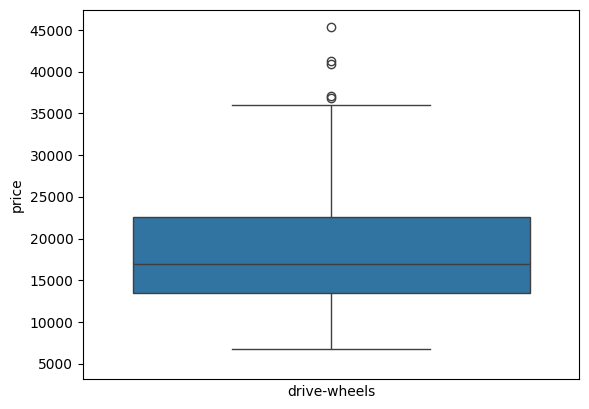

In [37]:
plt.boxplot(df1.price)
sns.boxplot(x='drive-wheels', y='price', data=df1)

plt.show()

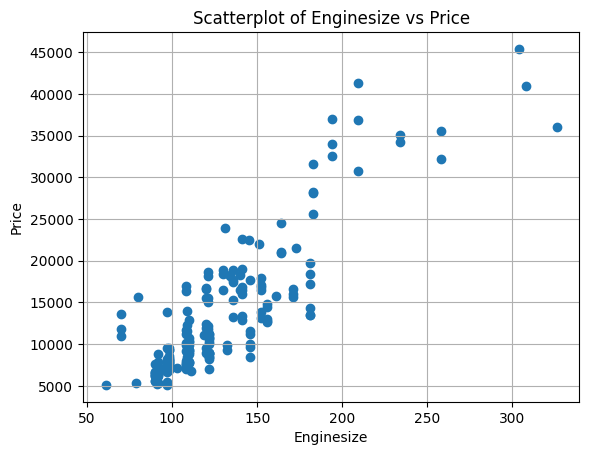

In [39]:
plt.scatter(x=df1['engine-size'], y=df1['price'])

plt.title("Scatterplot of Enginesize vs Price")
plt.xlabel("Enginesize")
plt.ylabel("Price")
plt.grid()
plt.show()

It is clear from the graph that enginesize and price have linear relation. As the enginesize increses, the price goes up.

In [ ]:
# Grouping data by Drive wheels and body style


Grouping data helps identify trends based on key variables.